# Perkenalan

Tugas ini dibuat oleh Arry Pandowo sebagai bagian dari pemenuhan Graded Challenge 1 Phase 1 Full Stack Data Science Boothcamp Hacktiv8

## Penjelasan Dataset 

Data Set yang digunakan adalah data rideshare dari Uber dan Lyff di kota Boston Massachusetts yang berasal dari kaggle pada [tautan berikut](https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma)

# Library

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from warnings import filterwarnings
from sklearn.preprocessing import StandardScaler
filterwarnings('ignore')

Penjelasan atas kegunaan dari masing masing library adalah sebagai berikut :
* matplotlib.pyplot digunakan untuk melakukan visualisasi plotting atas data yg akan diolah
* numpy digunakan untuk untuk melakukan perhitungan matematis aljabar linear
* pandas digunakan untuk mengakses dataframe (data loading dan manipulasi dataset)
* seaborn digunakan untuk mempercantik visualisasi
* sklearn.model_selection digunakan untuk melakukan proses training model
* sklearn.linear_model (Linear Regression) digunakan untuk melakukan proses pendefinisian model Linear Regression


# Data Loading 

In [2]:
df = pd.read_csv("rideshare_kaggle(1).csv")
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Data berhasil di load ke dalam parameter df untuk melakukan pemanggilan data

## analisis sederhana dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Terdapat beberapa informasi yang dapat diambil dari .info tersebut :
* Terdapat 57 features yang dapat diolah dengan berbagai macam tipe data
* Price memiliki data null yang akan diolah lebih lanjut 

# Data Cleaning

Sesuai dengan rekomendasi, maka yg akan dicari adalah pattern antara predectors hour dan price maka beberapa data yang menurut saya tidak begitu memiliki korelasi langsung akan ditakeout dengan penjelasan sebagai berikut :

* id ditakeout karena tidak memiliki informasi bermakna untuk saat ini
* timestamp formatnya terlalu sulit dibaca
* segala hal yang berkaitan dengan percuacaan
* timezone karena masih dalam satu daerah
* latitude dan longitude (buat apaan ?)

In [4]:
print(df.columns.tolist())

['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'short_summary', 'long_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']


In [5]:
df.drop(["latitude", "longitude", "temperature", "apparentTemperature", "short_summary", "long_summary", "precipIntensity", "precipProbability", "windSpeed", "windGust", "windGustTime", "humidity", "visibility", "temperatureHigh", "temperatureLow", "temperatureLowTime", "apparentTemperatureHigh", "apparentTemperatureHighTime", "apparentTemperatureLow", "apparentTemperatureLowTime", "icon","dewPoint", "pressure", "windBearing", "cloudCover", "uvIndex", "visibility.1", "ozone", "icon", "precipIntensityMax", "uvIndexTime", "temperatureMin", "temperatureMinTime", "temperatureMax", "temperatureMaxTime", "apparentTemperatureMin", "apparentTemperatureMinTime", "apparentTemperatureMax", "apparentTemperatureMaxTime", "temperatureHighTime", "id", "timestamp", "temperatureHighTime", "sunriseTime", "sunsetTime", "moonPhase", "surge_multiplier", "product_id", "timezone"], axis=1, inplace=True)

In [6]:
print(df.columns.tolist())

['hour', 'day', 'month', 'datetime', 'source', 'destination', 'cab_type', 'name', 'price', 'distance']


sisa Feature yang akan digunakan untuk melakukan penyusunan model prediksi harga

## Menghilangkan data N/A

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   hour         693071 non-null  int64  
 1   day          693071 non-null  int64  
 2   month        693071 non-null  int64  
 3   datetime     693071 non-null  object 
 4   source       693071 non-null  object 
 5   destination  693071 non-null  object 
 6   cab_type     693071 non-null  object 
 7   name         693071 non-null  object 
 8   price        637976 non-null  float64
 9   distance     693071 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 52.9+ MB


In [8]:
df.isna().sum()

hour               0
day                0
month              0
datetime           0
source             0
destination        0
cab_type           0
name               0
price          55095
distance           0
dtype: int64

In [9]:
(55095/693071)*100 

7.949402009317949

In [10]:
df=df[df['price'].isnull()==False]

karena data price yang NA tidak cukup signifikan dari total entry (7.9% dari total records) maka data akan dihilangkan

# Explorasi Data & Preprocessing

## Transformasi kolom datetime

In [11]:
df['datetime'] = pd.to_datetime(df['datetime'])

Transformasi data dari argumen menjadi date time

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   hour         637976 non-null  int64         
 1   day          637976 non-null  int64         
 2   month        637976 non-null  int64         
 3   datetime     637976 non-null  datetime64[ns]
 4   source       637976 non-null  object        
 5   destination  637976 non-null  object        
 6   cab_type     637976 non-null  object        
 7   name         637976 non-null  object        
 8   price        637976 non-null  float64       
 9   distance     637976 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 53.5+ MB


In [13]:
df.describe()

,hour,day,month,price,distance
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,11.618528,17.797674,11.586550,16.545125,2.189261
std,6.948776,9.982083,0.492452,9.324359,1.135413
min,0.000000,1.000000,11.000000,2.500000,0.020000
25%,6.000000,13.000000,11.000000,9.000000,1.270000
50%,12.000000,17.000000,12.000000,13.500000,2.160000
75%,18.000000,28.000000,12.000000,22.500000,2.930000
max,23.000000,30.000000,12.000000,97.500000,7.860000


informasi statistik atas data yang akan digunakan, price memiliki standar deviasi yang tergolong rendah 

## Data distribution dari Price

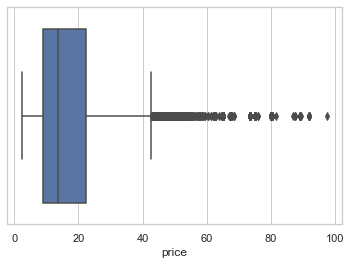

In [14]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df["price"])

# Data Grouping

## Analisa distribusi Data

### pengelompokan Data Numerik 

In [15]:
num_col=df.select_dtypes(include='number')

dilakukan pengelompokan atas data data yang memiliki tipe data numerik

In [16]:
num_col.shape

(637976, 5)

In [17]:
num_col.head()

,hour,day,month,price,distance
0,9,16,12,5.0,0.44
1,2,27,11,11.0,0.44
2,1,28,11,7.0,0.44
3,4,30,11,26.0,0.44
4,3,29,11,9.0,0.44


data berikut yg akan dijadikan material testing numerik kepada model 

## Pengelompokan Data Kategorik

In [18]:
cat_col=df.select_dtypes(include=['object'])

In [19]:
cat_col.shape

(637976, 4)

In [20]:
cat_col.head()

,source,destination,cab_type,name
0,Haymarket Square,North Station,Lyft,Shared
1,Haymarket Square,North Station,Lyft,Lux
2,Haymarket Square,North Station,Lyft,Lyft
3,Haymarket Square,North Station,Lyft,Lux Black XL
4,Haymarket Square,North Station,Lyft,Lyft XL


## Visualisasi distribusi data per feature

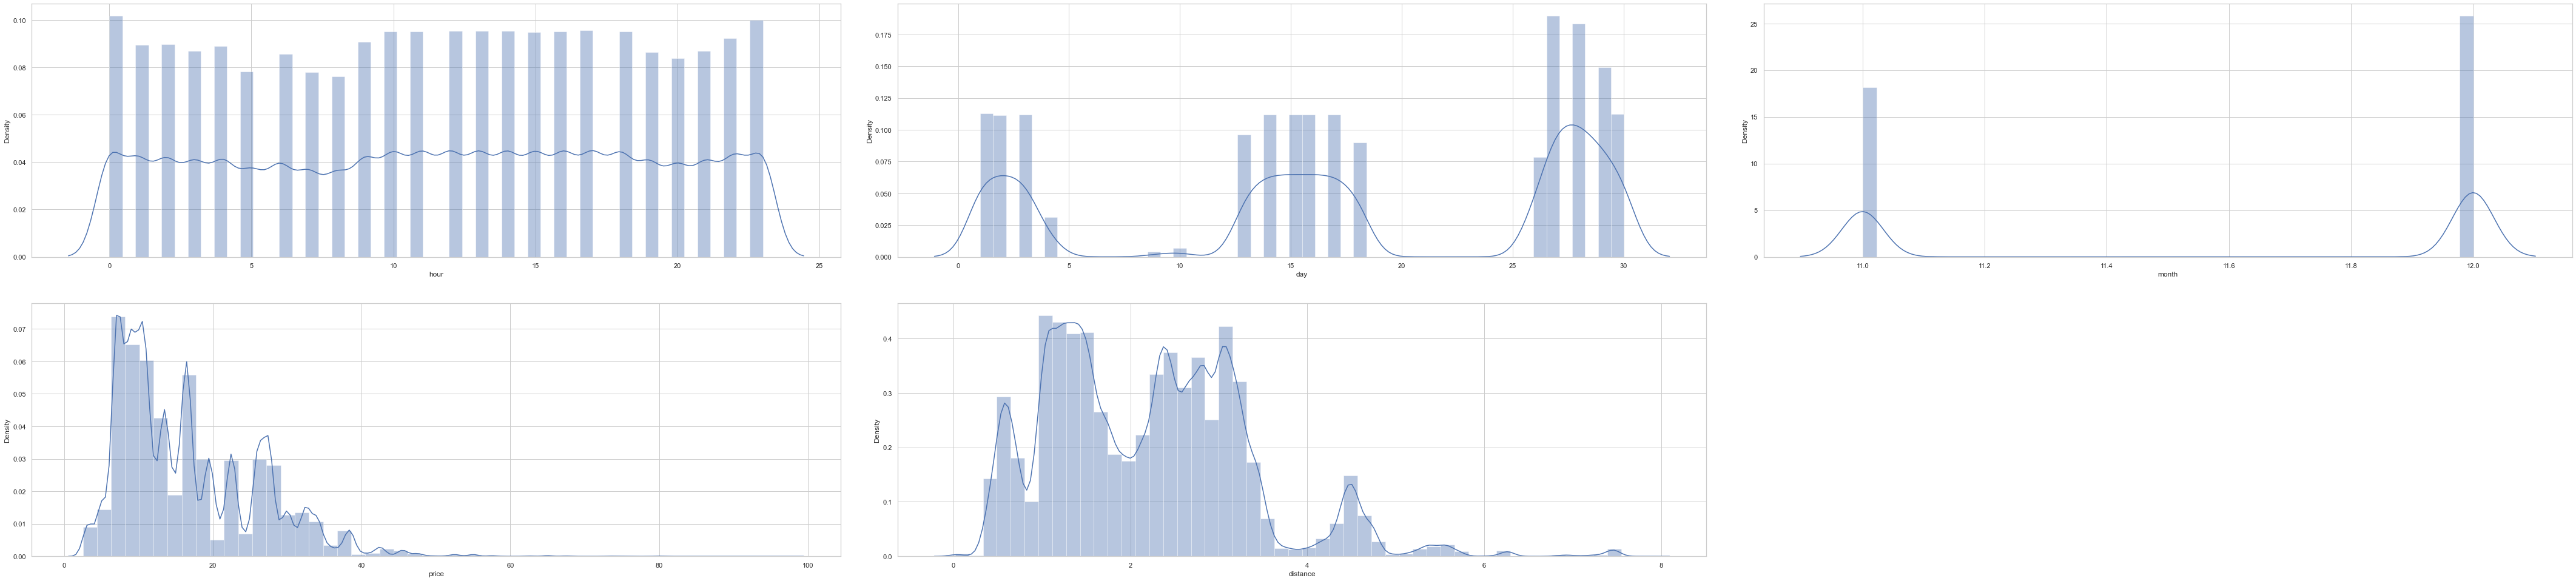

In [21]:
plt.figure(figsize=(60,55))
plt.rcParams.update({'font.size': 40})
j=1
for column in num_col:
    plt.subplot(8,3,j)
    sns.distplot(num_col[column])
    plt.tight_layout()
    j=j+1

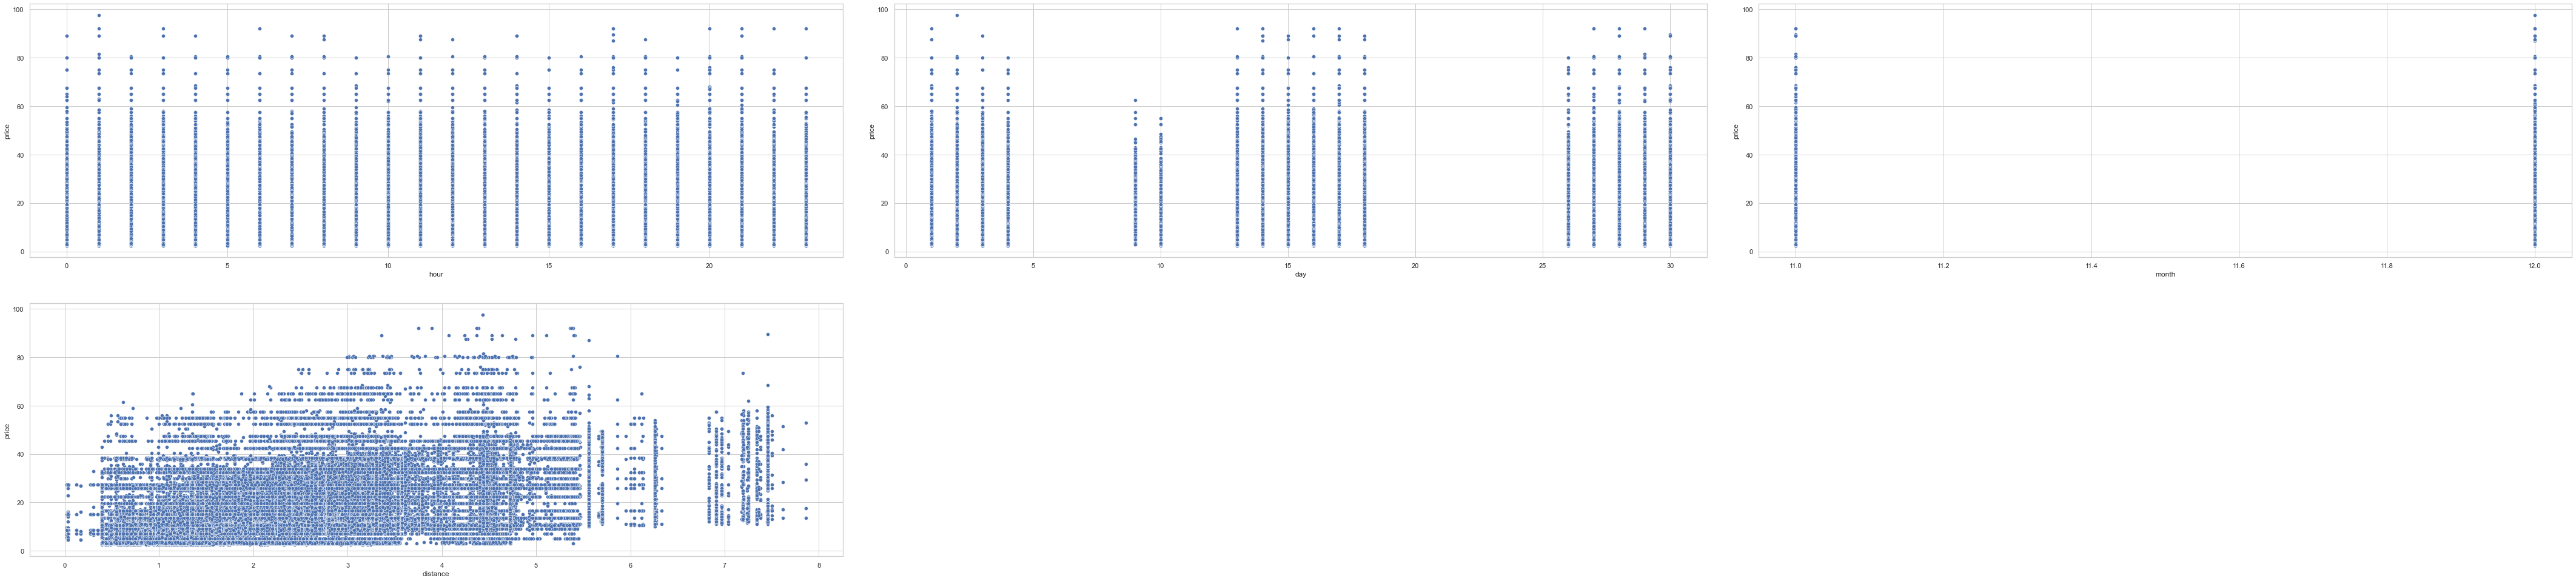

In [22]:
plt.figure(figsize=(60,55))
plt.rcParams.update({'font.size': 40})
j=1
for column in num_col:
    if column=='price':
        continue
    else:
        plt.subplot(8,3,j)
        sns.scatterplot(x=num_col[column],y=num_col['price'])
        plt.tight_layout()
        j=j+1

### Distribusi data terhadap Price

In [23]:
cat_col['price']=df['price']

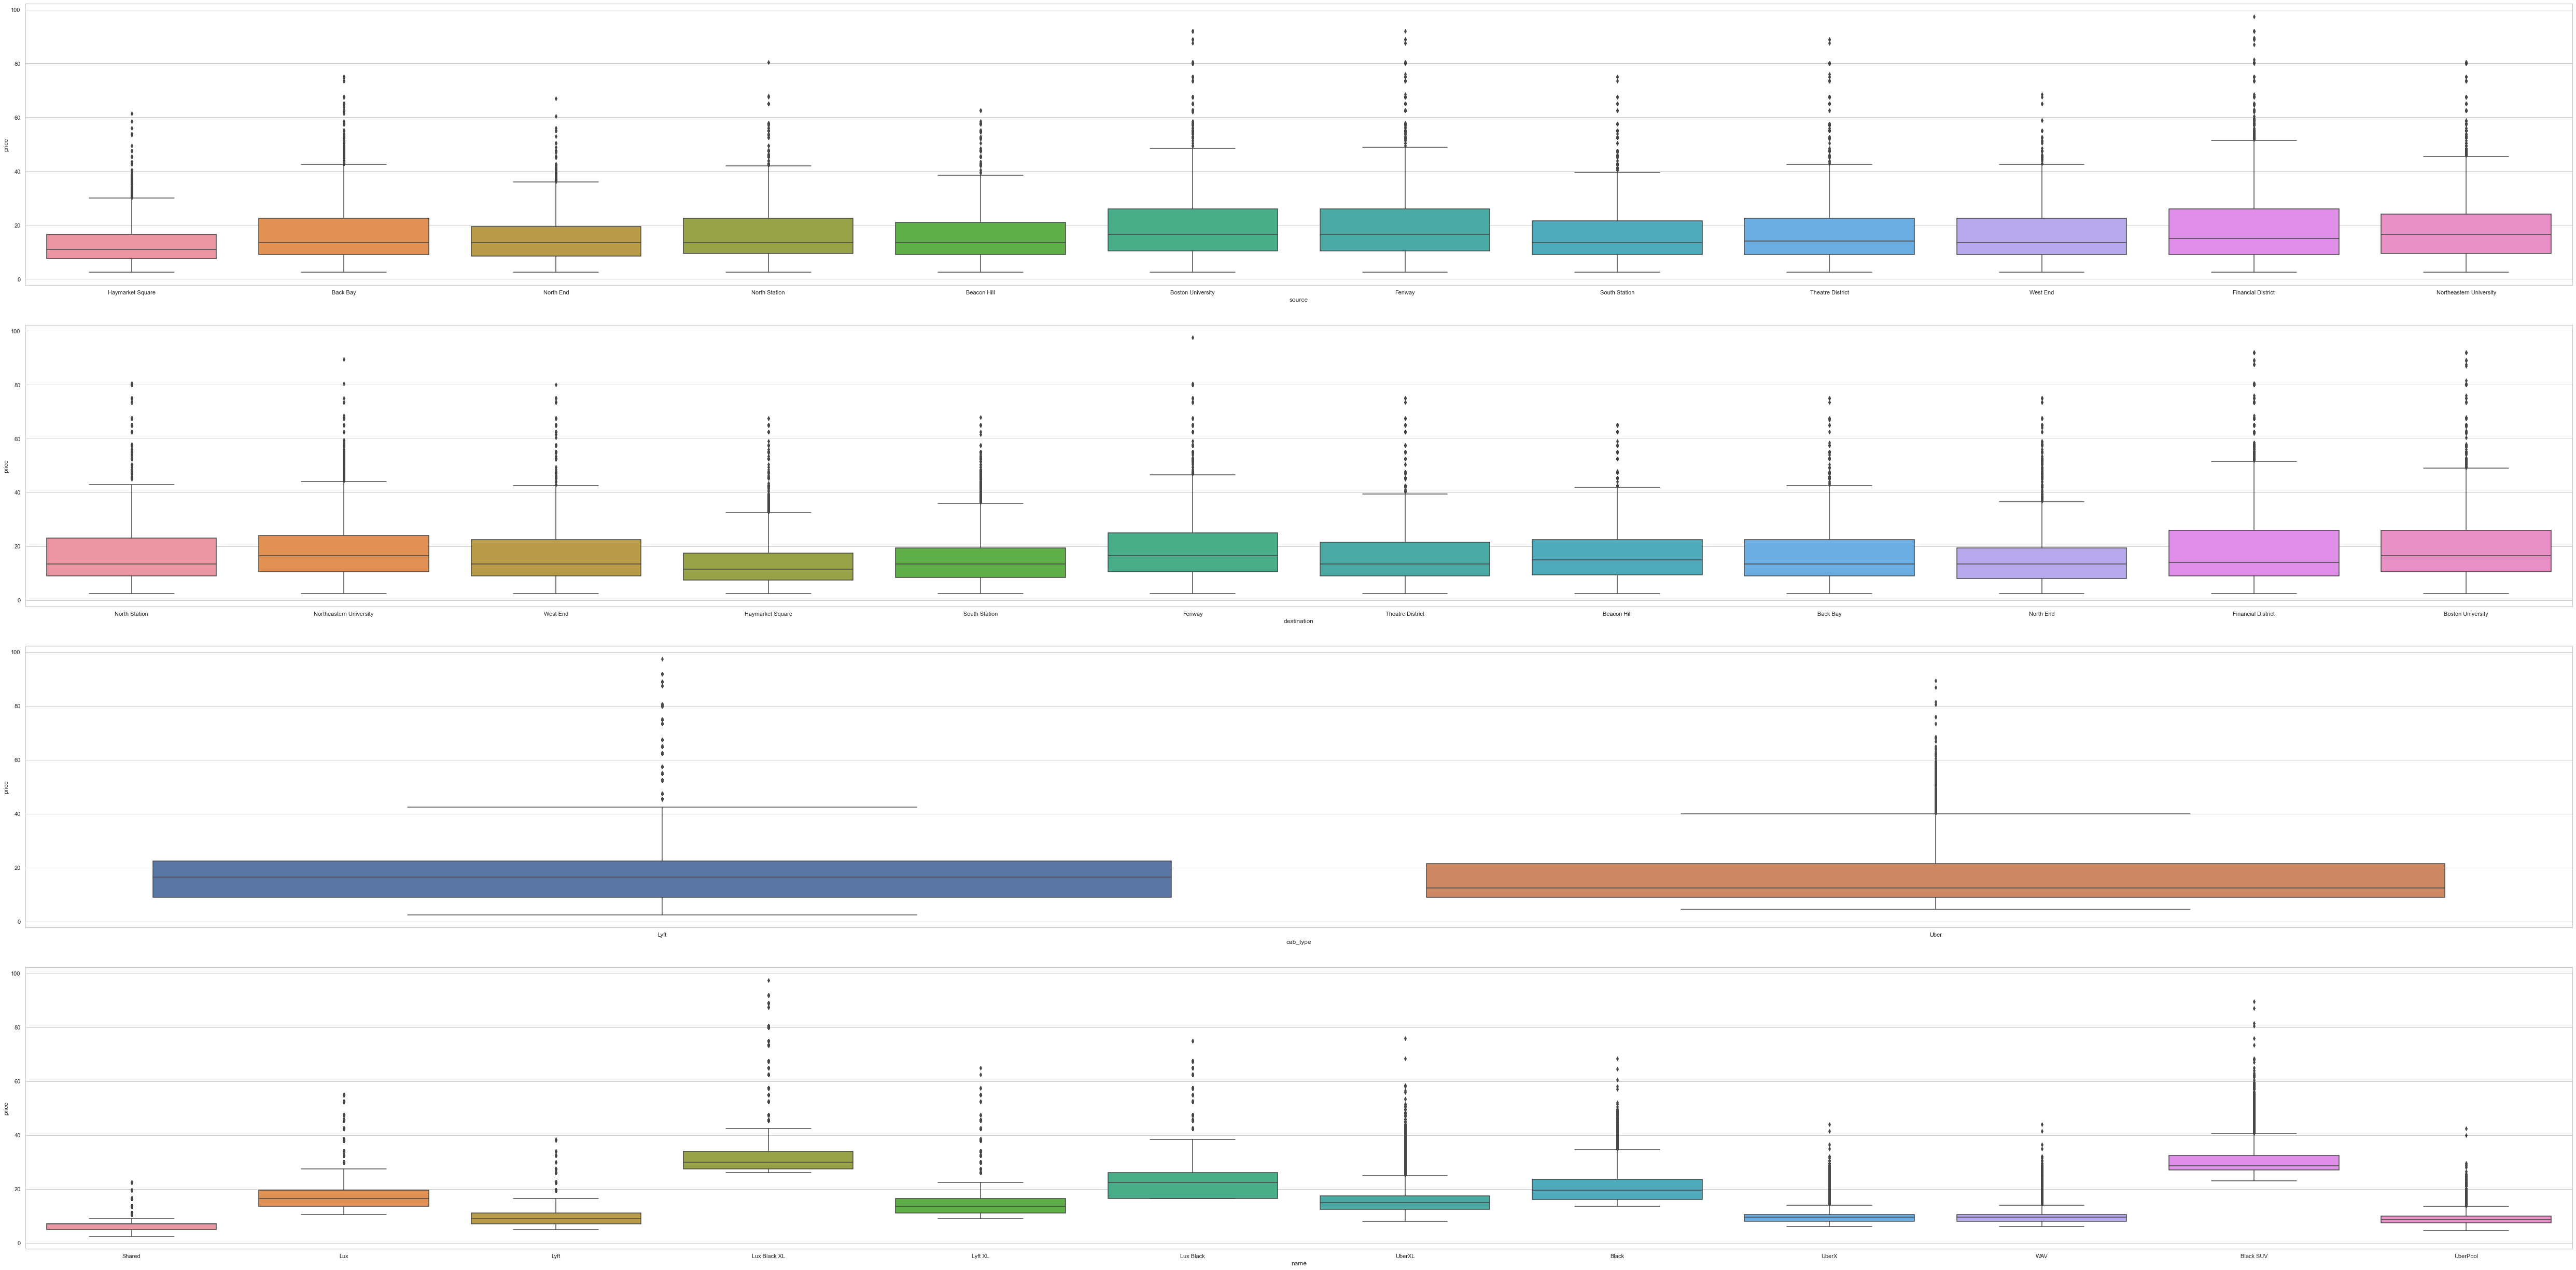

In [24]:
plt.figure(figsize=(70,69))
plt.rcParams.update({'font.size': 40})
j=1
for column in cat_col:
    if column=='price':
        continue
    else:
        plt.subplot(8,1,j)
        sns.boxplot(x=cat_col[column],y=cat_col['price'])
        plt.tight_layout()
        j=j+1

## Analisa Korelasi Data

In [25]:
corr = num_col.corr()

<AxesSubplot:>

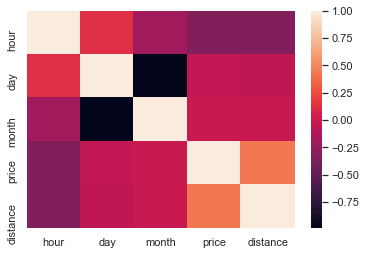

In [26]:
sns.heatmap(corr.corr())

## Pembentukan data Dummies

In [27]:
num_col=df.select_dtypes(include='number')

In [28]:
df=pd.get_dummies(df,columns=['cab_type'],drop_first=True)

In [29]:
df=pd.get_dummies(df,columns=['source'],drop_first=True)

In [30]:
df=pd.get_dummies(df,columns=['name'],drop_first=True)

In [31]:
data = df

### Pendefinisian data yang akan digunakan untuk feeding

In [32]:
feature_cols =num_col.drop(['price'],axis=1)
Y=data['price']
X=feature_cols

## Standard Scaller

In [33]:
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

## Splitting

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=55)

## Pendefinisian model dan Train the Model

In [35]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

LinearRegression(fit_intercept=False)

In [36]:
print(model.intercept_)
print(model.coef_)

0.0
[-0.0215525   0.0201404  -0.0037222   3.20766433]


In [37]:
X_train.shape

(446583, 4)

## Model Inference

In [38]:
y_pred = model.predict(X_test)
y_pred

array([ 0.9613105 , -3.92202566, -3.29421697, ..., -4.67314641,
        1.43705717, -3.06585406])

Testing Data atas model yang telah di definisikan dan di train

In [45]:
gap = Y_test - y_pred

gap antara data hasil testing dan validation dalam model inference

<AxesSubplot:>

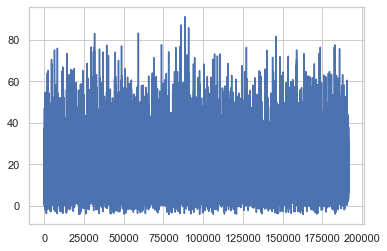

In [46]:
gap.reset_index(drop=True).plot()

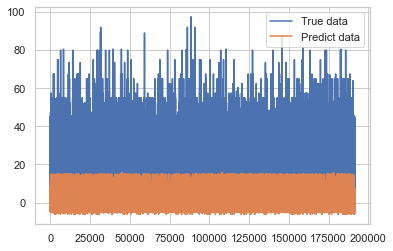

In [49]:
fig,ax = plt.subplots() #make canvas plot

plt.rcParams['agg.path.chunksize'] = 10000
y_test_reset = Y_test.reset_index(drop=True)


ax.plot(y_test_reset.index.values, Y_test, label='True data')
ax.plot(y_test_reset.index.values, y_pred, label='Predict data')
plt.legend()

## Pengambilan Kesimpulan

Hasil dari predict berada dibawah dari data asli, menandakan bahwa model Linear Regression kurang tepat digunakan pada dataset ini